CPU Scheduling Visualizer
Enter number of processes: 3
Arrival Time for P1: 1
Burst Time for P1: 10
Priority for P1 (lower is higher priority): 1
Arrival Time for P2: 2
Burst Time for P2: 7
Priority for P2 (lower is higher priority): 2
Arrival Time for P3: 3
Burst Time for P3: 5
Priority for P3 (lower is higher priority): 3

Choose Scheduling Algorithm:
1. FCFS
2. SJF
3. Round Robin
4. Priority Scheduling
Enter choice (1-4): 4


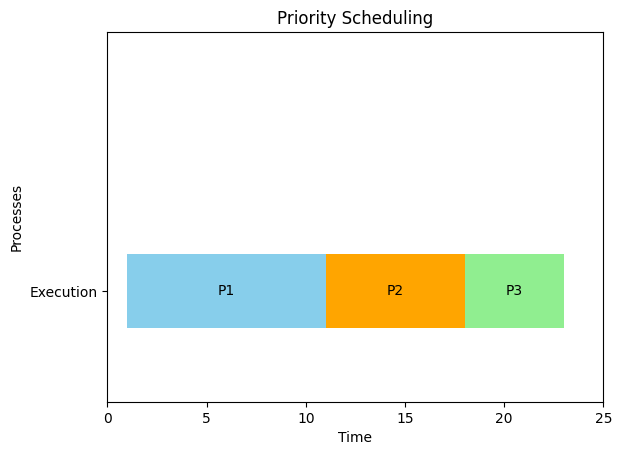

In [1]:
import matplotlib.pyplot as plt

# Define a Process class
class Process:
    def __init__(self, pid, arrival_time, burst_time, priority=0):
        self.pid = pid
        self.arrival_time = arrival_time
        self.burst_time = burst_time
        self.remaining_time = burst_time
        self.priority = priority
        self.start_time = None
        self.end_time = None

def get_process_data():
    n = int(input("Enter number of processes: "))
    processes = []
    for i in range(n):
        pid = f'P{i+1}'
        at = int(input(f"Arrival Time for {pid}: "))
        bt = int(input(f"Burst Time for {pid}: "))
        pr = int(input(f"Priority for {pid} (lower is higher priority): "))
        processes.append(Process(pid, at, bt, pr))
    return processes

def fcfs(processes):
    processes.sort(key=lambda x: x.arrival_time)
    time = 0
    timeline = []
    for p in processes:
        if time < p.arrival_time:
            time = p.arrival_time
        p.start_time = time
        p.end_time = time + p.burst_time
        timeline.append((p.pid, p.start_time, p.end_time))
        time = p.end_time
    return timeline

def sjf(processes):
    processes.sort(key=lambda x: (x.arrival_time, x.burst_time))
    time = 0
    timeline = []
    ready_queue = []
    while processes or ready_queue:
        while processes and processes[0].arrival_time <= time:
            ready_queue.append(processes.pop(0))
        if ready_queue:
            ready_queue.sort(key=lambda x: x.burst_time)
            p = ready_queue.pop(0)
            p.start_time = time
            p.end_time = time + p.burst_time
            timeline.append((p.pid, p.start_time, p.end_time))
            time = p.end_time
        else:
            time += 1
    return timeline

def round_robin(processes, quantum):
    queue = []
    time = 0
    timeline = []
    processes.sort(key=lambda x: x.arrival_time)
    index = 0
    while index < len(processes) or queue:
        while index < len(processes) and processes[index].arrival_time <= time:
            queue.append(processes[index])
            index += 1
        if queue:
            p = queue.pop(0)
            exec_time = min(p.remaining_time, quantum)
            start = time
            time += exec_time
            end = time
            p.remaining_time -= exec_time
            timeline.append((p.pid, start, end))
            if p.remaining_time > 0:
                while index < len(processes) and processes[index].arrival_time <= time:
                    queue.append(processes[index])
                    index += 1
                queue.append(p)
        else:
            time += 1
    return timeline

def priority_scheduling(processes):
    processes.sort(key=lambda x: (x.arrival_time, x.priority))
    time = 0
    timeline = []
    ready_queue = []
    while processes or ready_queue:
        while processes and processes[0].arrival_time <= time:
            ready_queue.append(processes.pop(0))
        if ready_queue:
            ready_queue.sort(key=lambda x: x.priority)
            p = ready_queue.pop(0)
            p.start_time = time
            p.end_time = time + p.burst_time
            timeline.append((p.pid, p.start_time, p.end_time))
            time = p.end_time
        else:
            time += 1
    return timeline

def draw_gantt_chart(timeline, title):
    fig, gnt = plt.subplots()
    gnt.set_title(title)
    gnt.set_xlabel('Time')
    gnt.set_ylabel('Processes')

    gnt.set_ylim(0, 50)
    gnt.set_xlim(0, max([x[2] for x in timeline]) + 2)
    gnt.set_yticks([15])
    gnt.set_yticklabels(["Execution"])

    colors = ['skyblue', 'orange', 'lightgreen', 'pink', 'gray', 'red', 'violet']
    for i, (pid, start, end) in enumerate(timeline):
        gnt.broken_barh([(start, end - start)], (10, 10),
                        facecolors=(colors[i % len(colors)]))
        gnt.text((start + end) / 2, 15, pid, ha='center', va='center', color='black')

    plt.show()

def main():
    print("CPU Scheduling Visualizer")
    processes = get_process_data()

    print("\nChoose Scheduling Algorithm:")
    print("1. FCFS")
    print("2. SJF")
    print("3. Round Robin")
    print("4. Priority Scheduling")
    choice = int(input("Enter choice (1-4): "))

    if choice == 1:
        timeline = fcfs(processes)
        draw_gantt_chart(timeline, "FCFS Scheduling")
    elif choice == 2:
        timeline = sjf(processes)
        draw_gantt_chart(timeline, "SJF Scheduling")
    elif choice == 3:
        quantum = int(input("Enter Time Quantum: "))
        timeline = round_robin(processes, quantum)
        draw_gantt_chart(timeline, "Round Robin Scheduling")
    elif choice == 4:
        timeline = priority_scheduling(processes)
        draw_gantt_chart(timeline, "Priority Scheduling")
    else:
        print("Invalid choice!")

if __name__ == "__main__":
    main()
